In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

In [2]:
# source https://github.com/beta2k/penaltyKicksTransfermarkt
df = pd.read_csv('data/top_penalties.csv')

In [3]:
df.head()

,League,Club,Position,Name,Successes,Failures,Total Attempts
0,Premier League,Manchester City,Central Midfield,Fernandinho,11,6,17
1,Premier League,Manchester City,Central Midfield,Yaya Touré,15,0,15
2,Premier League,Manchester City,Centre-Forward,Sergio Agüero,29,8,37
3,Premier League,Manchester United,Central Midfield,Bastian Schweinsteiger,9,2,11
4,Premier League,Manchester United,Attacking Midfield,Juan Mata,10,4,14


In [4]:
df = df.sort_values('Total Attempts', ascending=False)

In [44]:
df.describe()

,Successes,Failures,Total Attempts,Success Rate
count,385.000000,385.000000,385.000000,385.000000
mean,15.776623,3.457143,19.233766,0.820727
std,9.630516,2.654371,11.465637,0.101420
min,5.000000,0.000000,11.000000,0.420000
25%,11.000000,2.000000,12.000000,0.760000
50%,13.000000,3.000000,16.000000,0.820000
75%,18.000000,5.000000,22.000000,0.890000
max,92.000000,19.000000,110.000000,1.000000


In [5]:
df['Success Rate'] = np.round(df['Successes'] / df['Total Attempts'], 2)
df.head(30)

,League,Club,Position,Name,Successes,Failures,Total Attempts,Success Rate
50,LaLiga,Real Madrid,Left Wing,Cristiano Ronaldo,92,18,110,0.84
90,Serie A,AS Roma,Centre-Forward,Francesco Totti,86,18,104,0.83
53,LaLiga,FC Barcelona,Right Wing,Lionel Messi,69,19,88,0.78
6,Premier League,Manchester United,Centre-Forward,Zlatan Ibrahimovic,67,9,76,0.88
366,Major League Soccer,New York City FC,Centre-Forward,David Villa,54,11,65,0.83
192,Süper Lig,Antalyaspor,Centre-Forward,Samuel Eto'o,43,11,54,0.80
271,Championship,Cardiff City,Centre-Forward,Rickie Lambert,50,3,53,0.94
162,Ligue 1,Paris Saint-Germain,Centre-Forward,Edinson Cavani,41,9,50,0.82
370,Major League Soccer,Orlando City SC,Attacking Midfield,Kaká,39,7,46,0.85
179,Süper Lig,Fenerbahce SK,Centre-Forward,Robin van Persie,37,7,44,0.84


## Grid Search to form Posterior (with flat priors)

In [46]:
def get_player_posterior(name, df, prior=None):
    """
    Function for getting posterior probability (with flat priors)
    from df
    
    Inputs
    -----
    prior: lst
        list of prior probabilities, if None, use flat prior
    """
    makes = df[df['Name'] == name]['Successes'].values[0]
    attempts = df[df['Name'] == name]['Total Attempts'].values[0]
    
    p_grid1 = np.linspace(0, 1, 1000)
    if prior == None:
        prior1 = [1] * 1000
    else:
        prior1 = prior
    likelihoods = ss.binom.pmf(makes, attempts, p=p_grid1)
    unstd_posterior = likelihoods * prior1
    posterior = unstd_posterior / sum(unstd_posterior)
    
    return posterior

In [47]:
cristiano_posterior = get_player_posterior('Cristiano Ronaldo', df)
messi_posterior = get_player_posterior('Lionel Messi', df)
hazard_posterior = get_player_posterior('Eden Hazard', df)
zlatan_posterior = get_player_posterior('Zlatan Ibrahimovic', df)
neymar_posterior = get_player_posterior('Neymar', df)
suarez_posterior = get_player_posterior('Luis Suárez', df)

In [48]:
players = ['Cristiano Ronaldo' ,'Lionel Messi', 'Eden Hazard',
          'Zlatan Ibrahimovic', 'Neymar', 'Luis Suárez']

df[df['Name'].isin(players)]

,League,Club,Position,Name,Successes,Failures,Total Attempts,Success Rate
50,LaLiga,Real Madrid,Left Wing,Cristiano Ronaldo,92,18,110,0.84
53,LaLiga,FC Barcelona,Right Wing,Lionel Messi,69,19,88,0.78
6,Premier League,Manchester United,Centre-Forward,Zlatan Ibrahimovic,67,9,76,0.88
12,Premier League,Chelsea FC,Left Wing,Eden Hazard,35,5,40,0.88
52,LaLiga,FC Barcelona,Left Wing,Neymar,31,8,39,0.79
54,LaLiga,FC Barcelona,Centre-Forward,Luis Suárez,29,9,38,0.76


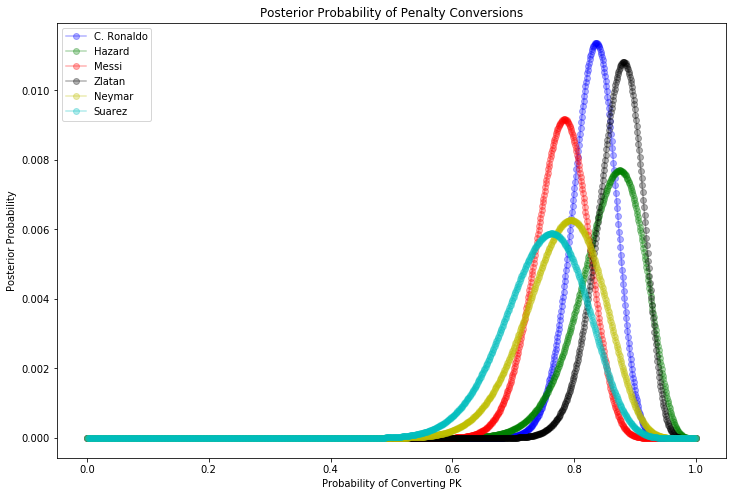

In [8]:
p_grid = np.linspace(0, 1, 1000)

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(p_grid, cristiano_posterior, color='b', marker='o', label='C. Ronaldo', alpha=0.3)
ax.plot(p_grid, hazard_posterior, color='g', marker='o', label='Hazard', alpha=0.3)
ax.plot(p_grid, messi_posterior, color='r', marker='o', label='Messi', alpha=0.3)
ax.plot(p_grid, zlatan_posterior, color='k', marker='o', label='Zlatan', alpha=0.3)
ax.plot(p_grid, neymar_posterior, color='y', marker='o', label='Neymar', alpha=0.3)
ax.plot(p_grid, suarez_posterior, color='c', marker='o', label='Suarez', alpha=0.3)
ax.set_title('Posterior Probability of Penalty Conversions')
ax.set_xlabel('Probability of Converting PK')
ax.set_ylabel('Posterior Probability')
ax.legend();

In [86]:
# df.sort_values('Success Rate', ascending=False).iloc[30:60, :]

In [10]:
lambert_posterior = get_player_posterior('Rickie Lambert', df)
fabinho_posterior = get_player_posterior('Fabinho', df)
chicharito_posterior = get_player_posterior('Chicharito', df)
zlatan_posterior = get_player_posterior('Zlatan Ibrahimovic', df)
ozil_posterior = get_player_posterior('Mesut Özil', df)
feilhaber_posterior = get_player_posterior('Benny Feilhaber', df)

In [12]:
players2 = ['Rickie Lambert' ,'Fabinho', 'Chicharito',
          'Zlatan Ibrahimovic', 'Mesut Özil', 'Benny Feilhaber']

df[df['Name'].isin(players2)]

,League,Club,Position,Name,Successes,Failures,Total Attempts,Success Rate
6,Premier League,Manchester United,Centre-Forward,Zlatan Ibrahimovic,67,9,76,0.88
271,Championship,Cardiff City,Centre-Forward,Rickie Lambert,50,3,53,0.94
132,1.Bundesliga,Bayer 04 Leverkusen,Centre-Forward,Chicharito,12,9,21,0.57
383,Major League Soccer,Sporting Kansas City,Central Midfield,Benny Feilhaber,13,1,14,0.93
164,Ligue 1,AS Monaco,Defensive Midfield,Fabinho,12,0,12,1.00
8,Premier League,Arsenal FC,Attacking Midfield,Mesut Özil,8,4,12,0.67


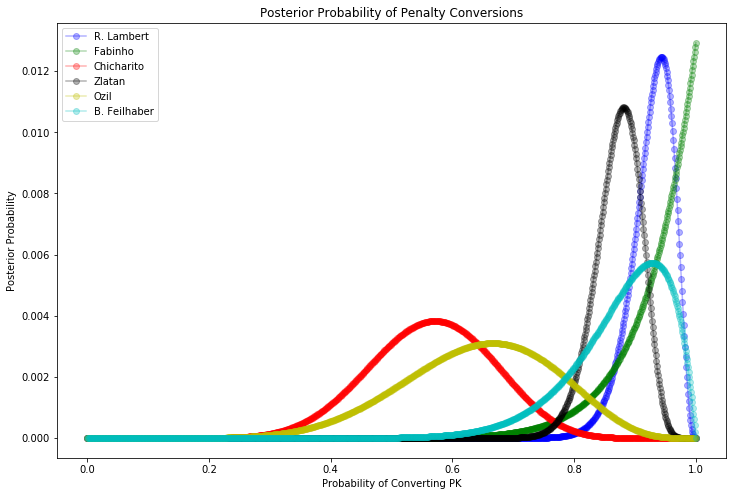

In [11]:
p_grid = np.linspace(0, 1, 1000)

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(p_grid, lambert_posterior, color='b', marker='o', label='R. Lambert', alpha=0.3)
ax.plot(p_grid, fabinho_posterior, color='g', marker='o', label='Fabinho', alpha=0.3)
ax.plot(p_grid, chicharito_posterior, color='r', marker='o', label='Chicharito', alpha=0.3)
ax.plot(p_grid, zlatan_posterior, color='k', marker='o', label='Zlatan', alpha=0.3)
ax.plot(p_grid, ozil_posterior, color='y', marker='o', label='Ozil', alpha=0.3)
ax.plot(p_grid, feilhaber_posterior, color='c', marker='o', label='B. Feilhaber', alpha=0.3)
ax.set_title('Posterior Probability of Penalty Conversions')
ax.set_xlabel('Probability of Converting PK')
ax.set_ylabel('Posterior Probability')
ax.legend();

### Look at distribution of conversion rates up to 2018

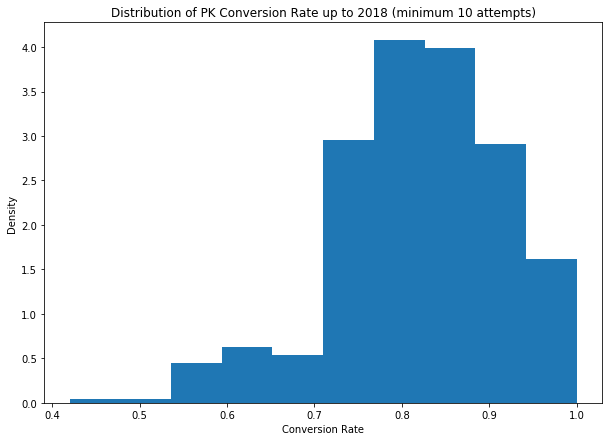

In [13]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.hist(df['Success Rate'], density=True)
ax.set_title('Distribution of PK Conversion Rate up to 2018 (minimum 10 attempts)')
ax.set_ylabel('Density')
ax.set_xlabel('Conversion Rate');

Going to use this data to create a prior using a beta distribution.

In [228]:
class Prior:
    def __init__(self, alpha0=1, alpha1=1):
        """Beta prior for binary data."""

        self.a0 = alpha0
        self.a1 = alpha1
        self.p0rv = ss.beta(self.a0, self.a1)

    def interval(self, prob):
        """End points for region of pdf containing `prob` of the
        pdf-- this uses the cdf and inverse.

        Ex: interval(0.95)
        """

        return self.p0rv.interval(prob)

    def mean(self):
        """Returns prior mean."""

        return self.p0rv.mean()

    def pdf(self, p0):
        """Probability density at p0."""

        return self.p0rv.pdf(p0)

    def plot(self):
        """A plot showing mean and 95% credible interval."""

        fig, ax = plt.subplots(1, 1)
        x = np.arange(0., 1., 0.01)

        # get prior mean p0
        mean = self.mean()

        # get low/high pts containg 95% probability
        low_p0, high_p0 = self.interval(0.95)
        x_prob = np.arange(low_p0, high_p0, 0.01)

        # plot pdf
        ax.plot(x, self.pdf(x), 'r-')

        # fill 95% region
        ax.fill_between(x_prob, 0, self.pdf(x_prob),
                        color='red', alpha='0.2' )

        # mean
        ax.stem([mean], [self.pdf(mean)], linefmt='r-',
                markerfmt='ro', basefmt='w-')

        ax.set_xlabel('')
        ax.set_ylabel('Prior PDF')
        ax.set_ylim(0., 1.1*np.max(self.pdf(x)))

        plt.show()

/Users/david/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


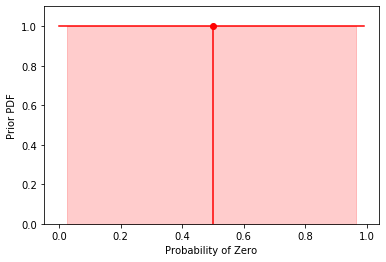

In [15]:
pri = Prior(1, 1)
pri.plot()

In [16]:
print(f"Prior mean: {pri.mean()}")
cred_int = pri.interval(0.95)
print(f"95% CI: {np.round(cred_int[0], 2)} -- {cred_int[1]}")

Prior mean: 0.5
95% CI: 0.03 -- 0.975


/Users/david/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


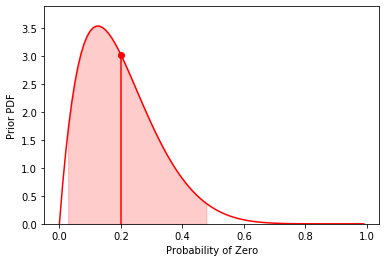

In [17]:
pri = Prior(2, 8)
pri.plot()

/Users/david/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


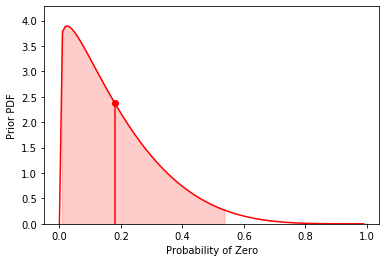

In [136]:
# prior
prior2 = Prior(1.1, 5)
prior2.plot()

/Users/david/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


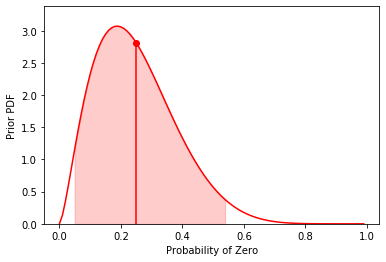

In [38]:
# prior
prior3 = Prior(2.5, 7.5)
prior3.plot()

### Grid Approximation for Penalty Kicks

In [45]:
# def get_player_posterior2(name, df, priors):
#     """
#     Function for getting posterior probability (with flat priors)
#     from df
#     """
#     makes = df[df['Name'] == name]['Successes'].values[0]
#     attempts = df[df['Name'] == name]['Total Attempts'].values[0]
    
#     p_grid1 = np.linspace(0, 1, 1000)
#     prior1 = priors
#     likelihoods = ss.binom.pmf(makes, attempts, p=p_grid1)
#     unstd_posterior = likelihoods * prior1
#     posterior = unstd_posterior / sum(unstd_posterior)
    
#     return posterior

In [137]:
beta_priors = [prior2.pdf(x) for x in p_grid]

cristiano_posterior = get_player_posterior2('Cristiano Ronaldo', df, beta_priors)
messi_posterior = get_player_posterior2('Lionel Messi', df, beta_priors)
hazard_posterior = get_player_posterior2('Eden Hazard', df, beta_priors)
zlatan_posterior = get_player_posterior2('Zlatan Ibrahimovic', df, beta_priors)
neymar_posterior = get_player_posterior2('Neymar', df, beta_priors)
suarez_posterior = get_player_posterior2('Luis Suárez', df, beta_priors)

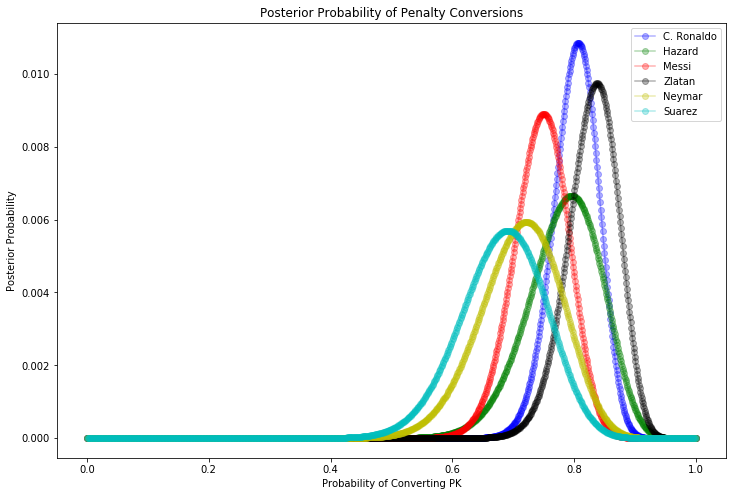

In [138]:
p_grid = np.linspace(0, 1, 1000)

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(p_grid, cristiano_posterior, color='b', marker='o', label='C. Ronaldo', alpha=0.3)
ax.plot(p_grid, hazard_posterior, color='g', marker='o', label='Hazard', alpha=0.3)
ax.plot(p_grid, messi_posterior, color='r', marker='o', label='Messi', alpha=0.3)
ax.plot(p_grid, zlatan_posterior, color='k', marker='o', label='Zlatan', alpha=0.3)
ax.plot(p_grid, neymar_posterior, color='y', marker='o', label='Neymar', alpha=0.3)
ax.plot(p_grid, suarez_posterior, color='c', marker='o', label='Suarez', alpha=0.3)
ax.set_title('Posterior Probability of Penalty Conversions')
ax.set_xlabel('Probability of Converting PK')
ax.set_ylabel('Posterior Probability')
ax.legend();

In [42]:
lambert_posterior = get_player_posterior2('Rickie Lambert', df, beta_priors)
fabinho_posterior = get_player_posterior2('Fabinho', df, beta_priors)
chicharito_posterior = get_player_posterior2('Chicharito', df, beta_priors)
zlatan_posterior = get_player_posterior2('Zlatan Ibrahimovic', df, beta_priors)
ozil_posterior = get_player_posterior2('Mesut Özil', df, beta_priors)
feilhaber_posterior = get_player_posterior2('Benny Feilhaber', df, beta_priors)

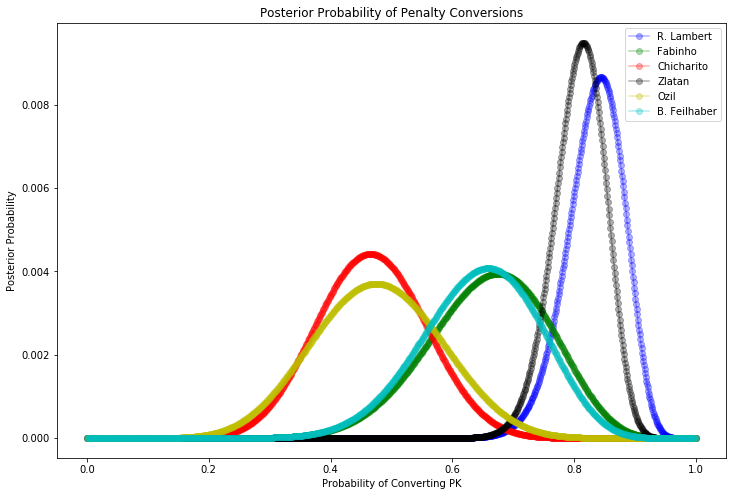

In [43]:
p_grid = np.linspace(0, 1, 1000)

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(p_grid, lambert_posterior, color='b', marker='o', label='R. Lambert', alpha=0.3)
ax.plot(p_grid, fabinho_posterior, color='g', marker='o', label='Fabinho', alpha=0.3)
ax.plot(p_grid, chicharito_posterior, color='r', marker='o', label='Chicharito', alpha=0.3)
ax.plot(p_grid, zlatan_posterior, color='k', marker='o', label='Zlatan', alpha=0.3)
ax.plot(p_grid, ozil_posterior, color='y', marker='o', label='Ozil', alpha=0.3)
ax.plot(p_grid, feilhaber_posterior, color='c', marker='o', label='B. Feilhaber', alpha=0.3)
ax.set_title('Posterior Probability of Penalty Conversions')
ax.set_xlabel('Probability of Converting PK')
ax.set_ylabel('Posterior Probability')
ax.legend();

# WP

In [53]:
players = ['Cristiano Ronaldo' ,'Lionel Messi', 'Eden Hazard',
          'Zlatan Ibrahimovic', 'Neymar', 'Luis Suárez']

df[df['Name'].isin(players)].sort_values('Success Rate', ascending=False)

,League,Club,Position,Name,Successes,Failures,Total Attempts,Success Rate
6,Premier League,Manchester United,Centre-Forward,Zlatan Ibrahimovic,67,9,76,0.88
12,Premier League,Chelsea FC,Left Wing,Eden Hazard,35,5,40,0.88
50,LaLiga,Real Madrid,Left Wing,Cristiano Ronaldo,92,18,110,0.84
52,LaLiga,FC Barcelona,Left Wing,Neymar,31,8,39,0.79
53,LaLiga,FC Barcelona,Right Wing,Lionel Messi,69,19,88,0.78
54,LaLiga,FC Barcelona,Centre-Forward,Luis Suárez,29,9,38,0.76


/Users/david/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


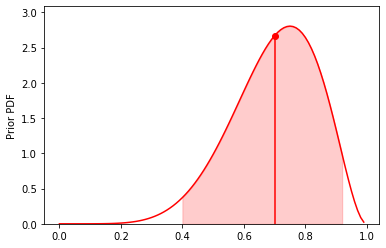

0.7
(0.39990642628368794, 0.9251453685803082)


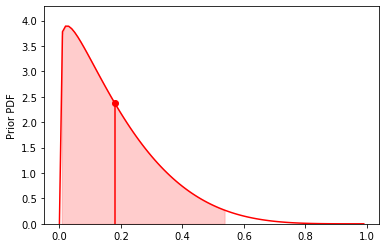

0.18032786885245905


In [238]:
# prior
prior3 = Prior(7, 3)
prior3.plot()
print(prior3.mean())
print(prior3.interval(0.95))


prior2 = Prior(1.1, 5)
prior2.plot()
print(prior2.mean())

In [219]:
beta_priors = [prior3.pdf(x) for x in p_grid]

cristiano_posterior_b = get_player_posterior2('Cristiano Ronaldo', df, beta_priors)
messi_posterior_b = get_player_posterior2('Lionel Messi', df, beta_priors)
hazard_posterior_b = get_player_posterior2('Eden Hazard', df, beta_priors)
zlatan_posterior_b = get_player_posterior2('Zlatan Ibrahimovic', df, beta_priors)
neymar_posterior_b = get_player_posterior2('Neymar', df, beta_priors)
suarez_posterior_b = get_player_posterior2('Luis Suárez', df, beta_priors)

cristiano_posterior = get_player_posterior('Cristiano Ronaldo', df)
messi_posterior = get_player_posterior('Lionel Messi', df)
hazard_posterior = get_player_posterior('Eden Hazard', df)
zlatan_posterior = get_player_posterior('Zlatan Ibrahimovic', df)
neymar_posterior = get_player_posterior('Neymar', df)
suarez_posterior = get_player_posterior('Luis Suárez', df)

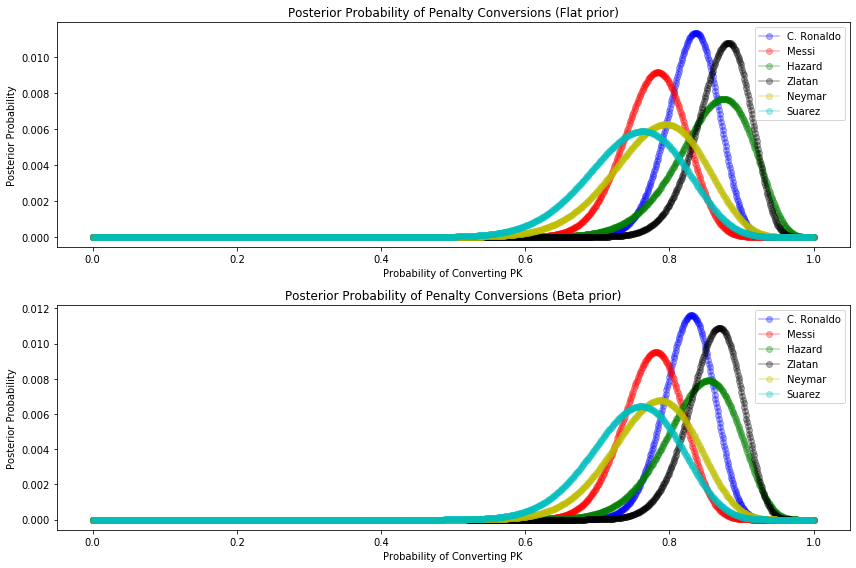

In [230]:
p_grid = np.linspace(0, 1, 1000)

fig, ax = plt.subplots(2, 1, figsize=(12, 8))

flat = [cristiano_posterior, messi_posterior, hazard_posterior, 
       zlatan_posterior, neymar_posterior, suarez_posterior]

beta = [cristiano_posterior_b, messi_posterior_b, hazard_posterior_b,
       zlatan_posterior_b, neymar_posterior_b, suarez_posterior_b]

posts = [flat, beta]

for i, ax in enumerate(fig.axes):
    ax.plot(p_grid, posts[i][0], color='b', marker='o', label='C. Ronaldo', alpha=0.3)
    ax.plot(p_grid, posts[i][1], color='r', marker='o', label='Messi', alpha=0.3)
    ax.plot(p_grid, posts[i][2], color='g', marker='o', label='Hazard', alpha=0.3)
    ax.plot(p_grid, posts[i][3], color='k', marker='o', label='Zlatan', alpha=0.3)
    ax.plot(p_grid, posts[i][4], color='y', marker='o', label='Neymar', alpha=0.3)
    ax.plot(p_grid, posts[i][5], color='c', marker='o', label='Suarez', alpha=0.3)
    if i == 0:
        ax.set_title('Posterior Probability of Penalty Conversions (Flat prior)')
    else:
        ax.set_title('Posterior Probability of Penalty Conversions (Beta prior)')

    ax.set_xlabel('Probability of Converting PK')
    ax.set_ylabel('Posterior Probability')
    ax.legend();
fig.tight_layout()

In [232]:
lambert_posterior_b = get_player_posterior('Rickie Lambert', df, beta_priors)
fabinho_posterior_b = get_player_posterior('Fabinho', df, beta_priors)
chicharito_posterior_b = get_player_posterior('Chicharito', df, beta_priors)
zlatan_posterior_b = get_player_posterior('Zlatan Ibrahimovic', df, beta_priors)
ozil_posterior_b = get_player_posterior('Mesut Özil', df, beta_priors)
feilhaber_posterior_b = get_player_posterior('Benny Feilhaber', df, beta_priors)

lambert_posterior = get_player_posterior('Rickie Lambert', df)
fabinho_posterior = get_player_posterior('Fabinho', df)
chicharito_posterior = get_player_posterior('Chicharito', df)
zlatan_posterior = get_player_posterior('Zlatan Ibrahimovic', df)
ozil_posterior = get_player_posterior('Mesut Özil', df)
feilhaber_posterior = get_player_posterior('Benny Feilhaber', df)

In [233]:
players2 = ['Rickie Lambert' ,'Fabinho', 'Chicharito',
          'Zlatan Ibrahimovic', 'Mesut Özil', 'Benny Feilhaber']

df[df['Name'].isin(players2)].sort_values('Success Rate', ascending=False)

,League,Club,Position,Name,Successes,Failures,Total Attempts,Success Rate
164,Ligue 1,AS Monaco,Defensive Midfield,Fabinho,12,0,12,1.00
271,Championship,Cardiff City,Centre-Forward,Rickie Lambert,50,3,53,0.94
383,Major League Soccer,Sporting Kansas City,Central Midfield,Benny Feilhaber,13,1,14,0.93
6,Premier League,Manchester United,Centre-Forward,Zlatan Ibrahimovic,67,9,76,0.88
8,Premier League,Arsenal FC,Attacking Midfield,Mesut Özil,8,4,12,0.67
132,1.Bundesliga,Bayer 04 Leverkusen,Centre-Forward,Chicharito,12,9,21,0.57


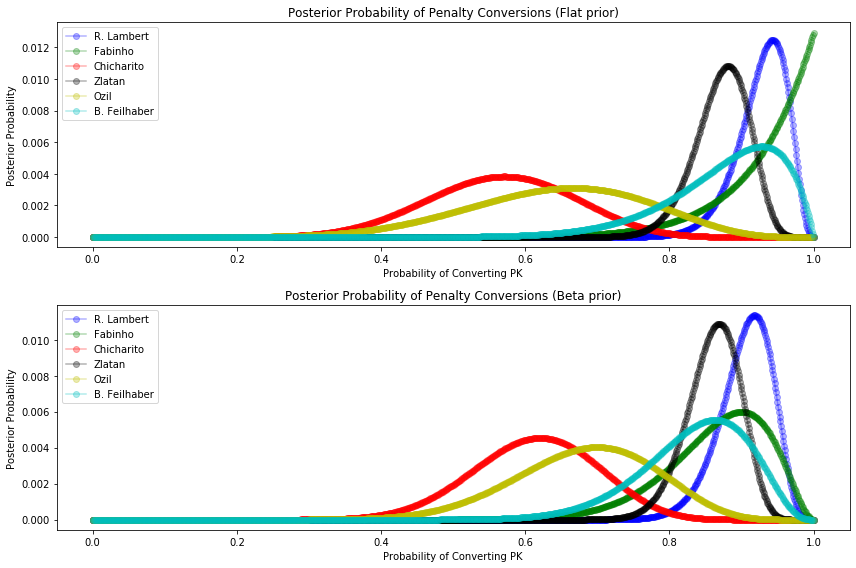

In [236]:
p_grid = np.linspace(0, 1, 1000)

fig, ax = plt.subplots(2, 1, figsize=(12, 8))

flat1 = [lambert_posterior, fabinho_posterior, chicharito_posterior, 
       zlatan_posterior, ozil_posterior, feilhaber_posterior]

beta1 = [lambert_posterior_b, fabinho_posterior_b, chicharito_posterior_b,
       zlatan_posterior_b, ozil_posterior_b, feilhaber_posterior_b]

posts1 = [flat1, beta1]

for i, ax in enumerate(fig.axes):
    ax.plot(p_grid, posts1[i][0], color='b', marker='o', label='R. Lambert', alpha=0.3)
    ax.plot(p_grid, posts1[i][1], color='g', marker='o', label='Fabinho', alpha=0.3)
    ax.plot(p_grid, posts1[i][2], color='r', marker='o', label='Chicharito', alpha=0.3)
    ax.plot(p_grid, posts1[i][3], color='k', marker='o', label='Zlatan', alpha=0.3)
    ax.plot(p_grid, posts1[i][4], color='y', marker='o', label='Ozil', alpha=0.3)
    ax.plot(p_grid, posts1[i][5], color='c', marker='o', label='B. Feilhaber', alpha=0.3)
    if i == 0:
        ax.set_title('Posterior Probability of Penalty Conversions (Flat prior)')
    else:
        ax.set_title('Posterior Probability of Penalty Conversions (Beta prior)')

    ax.set_xlabel('Probability of Converting PK')
    ax.set_ylabel('Posterior Probability')
    ax.legend();
fig.tight_layout()

In [224]:
players2 = ['Pierre-Emerick Aubameyang', 'Alexandre Lacazette', 'Mesut Özil']
df[df['Name'].isin(players2)].sort_values('Success Rate', ascending=False)

,League,Club,Position,Name,Successes,Failures,Total Attempts,Success Rate
163,Ligue 1,Olympique Lyon,Centre-Forward,Alexandre Lacazette,21,4,25,0.84
130,1.Bundesliga,Borussia Dortmund,Centre-Forward,Pierre-Emerick Aubameyang,14,3,17,0.82
8,Premier League,Arsenal FC,Attacking Midfield,Mesut Özil,8,4,12,0.67


In [225]:
pea_posterior_b = get_player_posterior('Pierre-Emerick Aubameyang', df, beta_priors)
ozil_posterior_b = get_player_posterior('Mesut Özil', df, beta_priors)
laca_posterior_b = get_player_posterior('Alexandre Lacazette', df, beta_priors)

pea_posterior = get_player_posterior('Pierre-Emerick Aubameyang', df)
ozil_posterior = get_player_posterior('Mesut Özil', df)
laca_posterior = get_player_posterior('Alexandre Lacazette', df)

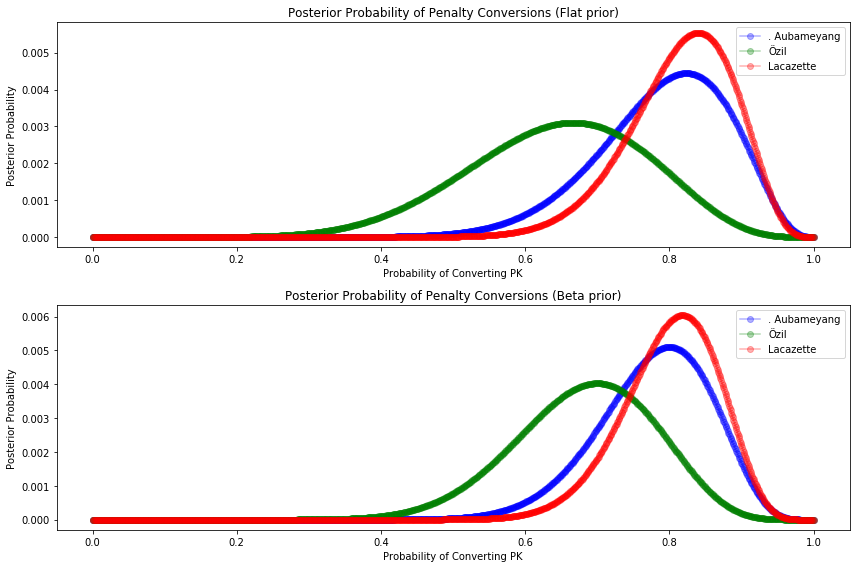

In [226]:
p_grid = np.linspace(0, 1, 1000)

fig, ax = plt.subplots(2, 1, figsize=(12, 8))

flat2 = [pea_posterior, ozil_posterior, laca_posterior]

beta2 = [pea_posterior_b, ozil_posterior_b, laca_posterior_b]

posts2 = [flat2, beta2]

for i, ax in enumerate(fig.axes):
    ax.plot(p_grid, posts2[i][0], color='b', marker='o', label='. Aubameyang', alpha=0.3)
    ax.plot(p_grid, posts2[i][1], color='g', marker='o', label='Özil', alpha=0.3)
    ax.plot(p_grid, posts2[i][2], color='r', marker='o', label='Lacazette', alpha=0.3)
    if i == 0:
        ax.set_title('Posterior Probability of Penalty Conversions (Flat prior)')
    else:
        ax.set_title('Posterior Probability of Penalty Conversions (Beta prior)')

    ax.set_xlabel('Probability of Converting PK')
    ax.set_ylabel('Posterior Probability')
    ax.legend();
fig.tight_layout()

In [205]:
df['Successes'].sum()

6074

In [206]:
df['Failures'].sum()

1331

In [158]:
df.head()

,League,Club,Position,Name,Successes,Failures,Total Attempts,Success Rate
50,LaLiga,Real Madrid,Left Wing,Cristiano Ronaldo,92,18,110,0.84
90,Serie A,AS Roma,Centre-Forward,Francesco Totti,86,18,104,0.83
53,LaLiga,FC Barcelona,Right Wing,Lionel Messi,69,19,88,0.78
6,Premier League,Manchester United,Centre-Forward,Zlatan Ibrahimovic,67,9,76,0.88
366,Major League Soccer,New York City FC,Centre-Forward,David Villa,54,11,65,0.83


In [152]:
from conjugate_prior import BetaBinomial

In [163]:
goals = 6074
misses = 1331
prior_model = BetaBinomial() #Uninformative prior
updated_model = prior_model.update(goals, misses)
credible_interval = updated_model.posterior(0.10, 0.90)
print ("There's {p:.2f}% chance that the coin is fair".format(p=credible_interval*100))
predictive = updated_model.predict(70, 30)
print ("The chance of flipping 50 Heads and 50 Tails in 100 trials is {p:.2f}%".format(p=predictive*100))

There's 100.00% chance that the coin is fair
The chance of flipping 50 Heads and 50 Tails in 100 trials is 0.13%
